Loading and Organizing Data from CIFAR10

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [4]:
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)

x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)


In [5]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
print('Noof classes:',K)
print('Noof training images:',Ntr)
print('Noof test images:',Nte)
print('Noof features:',Din)

x_train=x_train[range(Ntr),:]
y_train=y_train[range(Ntr),:]
x_test=x_test[range(Nte),:]
x_test=x_test[range(Nte),:]
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

Noof classes: 10
Noof training images: 50000
Noof test images: 10000
Noof features: 3072


In [6]:
print('original labels:',y_train.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
print('labels in class matrix:',y_train.shape)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

original labels: (50000, 1)
labels in class matrix: (50000, 10)


In [7]:
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train: (50000, 3072)
x_test: (10000, 3072)


Linear Classifier

In [8]:
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print('w1:',w1)

w1: (3072, 10)
b1: (10,)
w1: [[-2.06717783e-05 -2.55990764e-06 -1.68321601e-06 ...  1.54153099e-05
  -1.23645312e-05 -9.80608493e-06]
 [ 7.65636220e-07  3.10372587e-07  2.13940184e-06 ... -1.00063795e-05
  -2.49607384e-05  3.40873914e-06]
 [-4.83187692e-06  3.04994980e-06 -9.39540504e-07 ...  1.70569124e-05
   1.28107358e-06  8.82108609e-06]
 ...
 [-1.47980962e-05  4.00617852e-06 -1.22676334e-05 ...  1.44748422e-05
  -5.20421474e-06  1.04301185e-05]
 [ 9.62096972e-06  5.99350227e-07  1.14947605e-05 ... -5.12862640e-06
  -3.04470281e-05 -1.48305659e-05]
 [-2.17222215e-07  4.34442295e-06  2.30724807e-07 ... -3.34333016e-06
   6.44217044e-06 -2.10713841e-05]]


In [9]:
batch_size = Ntr
iterations = 300
lr = 1.4e-2
lr_decay=0.999
reg =5e-6
train_loss_history = []
train_acc_history = []
test_loss_history = []
test_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]

    # Forward pass
    y_pred=x.dot(w1) + b1
    y_pred_test=x_test.dot(w1)+b1
        
    loss=1./batch_size*(np.square(y_pred-y)).sum() + reg * np.sum(w1*w1)
    test_loss=1./Nte*(np.square(y_pred_test-y_test)).sum() + reg * np.sum(w1*w1)
    train_loss_history.append(loss)
    test_loss_history.append(test_loss)

    train_acc = 1.0 - (1/(batch_size*K))*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum()
    train_acc_history.append(train_acc)
    test_acc = 1.0 - (1/(Nte*K))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred_test,axis=1))).sum()
    test_acc_history.append(test_acc)

    if t%10==0:
        print('epoch %d/%d: train loss= %f-- ,test loss= %f--,train accuracy= %f--, test accuracy= %f' % (t,iterations,loss,test_loss,train_acc,test_acc))

        
    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw1=x.T.dot(dy_pred) + reg * w1
    db1=dy_pred.sum(axis=0)
    w1 -= lr*dw1
    b1 -= lr*db1
    lr *= lr_decay






epoch 0/300: train loss= 0.999983-- ,test loss= 0.999980--,train accuracy= 0.686826--, test accuracy= 0.689240
epoch 10/300: train loss= 0.876637-- ,test loss= 0.876236--,train accuracy= 0.756394--, test accuracy= 0.758050
epoch 20/300: train loss= 0.842540-- ,test loss= 0.842416--,train accuracy= 0.762628--, test accuracy= 0.767790
epoch 30/300: train loss= 0.823616-- ,test loss= 0.823714--,train accuracy= 0.766536--, test accuracy= 0.770580
epoch 40/300: train loss= 0.812388-- ,test loss= 0.812706--,train accuracy= 0.768630--, test accuracy= 0.771540
epoch 50/300: train loss= 0.805425-- ,test loss= 0.805969--,train accuracy= 0.770364--, test accuracy= 0.772950
epoch 60/300: train loss= 0.800905-- ,test loss= 0.801678--,train accuracy= 0.771520--, test accuracy= 0.773390
epoch 70/300: train loss= 0.797821-- ,test loss= 0.798823--,train accuracy= 0.772740--, test accuracy= 0.773590
epoch 80/300: train loss= 0.795605-- ,test loss= 0.796834--,train accuracy= 0.773750--, test accuracy= 0.

##### <html><h>Displaying trained weights for each class as images

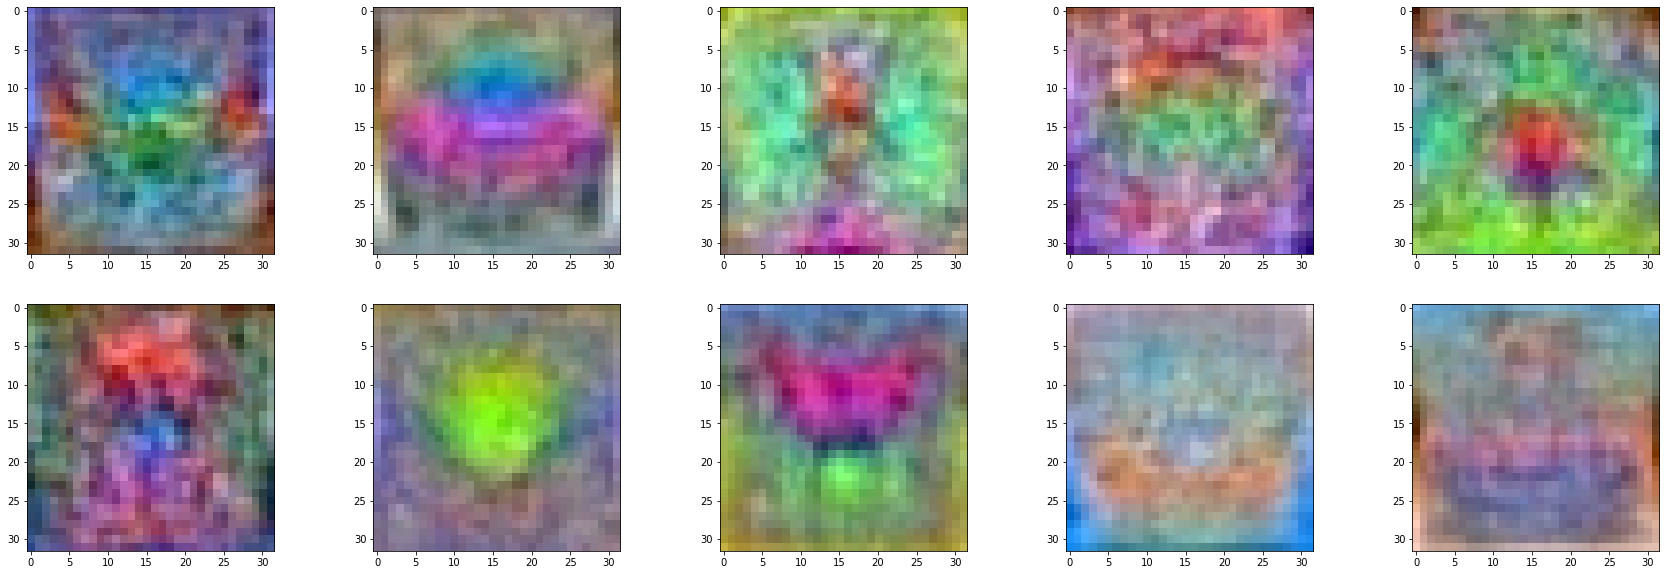

In [11]:
#Displaying w as 10 images
import cv2 as cv
images=[]
for i in range(w1.shape[1]):
    temp=np.reshape(w1[:,i]*255,(32,32,3))
    temp=cv.normalize(temp, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    images.append(temp)
fig,ax=plt.subplots(2,5,figsize=(30,10))
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(images[i*5+j],vmin=0,vmax=255)
plt.savefig('ws.png')
plt.show()